# Estimating Unbanked Rates With Demographic Information
### Using Machine Learning to Identify Policy Targets

#### Xavier Adomatis
#### 12/01/2021
#### PPOL 564

## Problem Statement and Background

Participation in the banking system is key to financial health. It has a litany of benefits that set people on the course for positive outcomes: it keeps your money safe, grants access to credit, and overall aids in your financial future. It's true benefit, however, is the absence of the losses. People that are banked save thousands in fees lost to alternative tranaction services like check cashers, have major risks for losing money to physical threats like fires and theft, and are vulnerable to predatory credit services.

In recent years, approximatley 19 in 20 households are "banked," though that rate has mildly declined since the great recession. Unbanked people are largely economically disadvantaged, younger, minorities, with less education and atypical family structures. The next slide and its subsets will display the disparities across several categorical variables.

In [2]:
import pandas as pd
from plotnine import *
import warnings
warnings.filterwarnings('ignore')
import plotnine as p9
import rise
import nbextensions
import seaborn as sns
#import problem csvs
ed = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/ed_unbanked")
ft = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/ft_unbanked")
inc = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/income_unbanked")
race = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/race_unbanked")
age = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/age_unbanked")
inc = inc.replace("<15k","0-15k")
#import results csvs
pred_bi = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/pred_bi")
pred_mix = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/pred_mix")
test_bi = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/test_bi")
test_mix = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/test_mix")
correlation_mat = pd.read_csv("/Users/xavier/Desktop/DSPP/DS/Data-Science-1-Final-Project/Slides/graph_data/corr")


## Percent Unbanked Over Categorical Variables

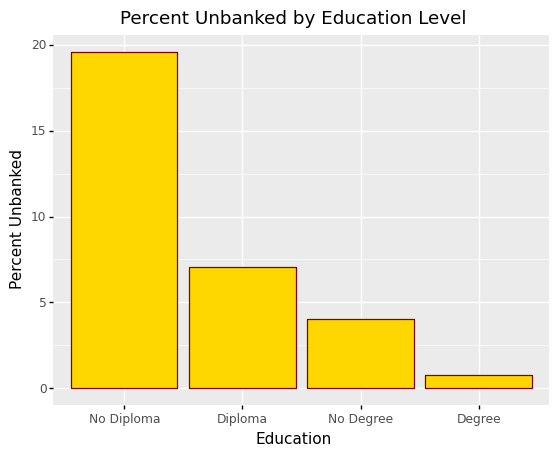

<ggplot: (8788741689850)>

In [2]:
(ggplot(ed)       
 + aes(x='ed_name', y='pct_unb')    
 + geom_bar(stat="identity", color="maroon",fill="gold") # defining the type of plot to use
 + scale_x_discrete(limits=ed.ed_name)
 + labs(title='Percent Unbanked by Education Level', x='Education', y='Percent Unbanked') 
)

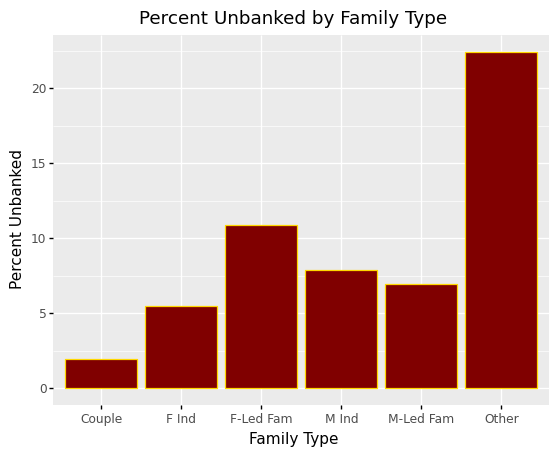

<ggplot: (8788741934460)>

In [3]:
(ggplot(ft)       
 + aes(x='ft_name', y='pct_unb')    
 + geom_bar(stat="identity", color="gold",fill="maroon") # defining the type of plot to use
 + labs(title='Percent Unbanked by Family Type', x='Family Type', y='Percent Unbanked') 
)

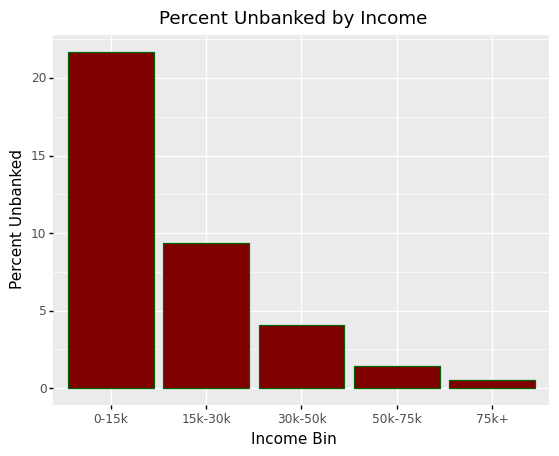

<ggplot: (8788741978411)>

In [4]:
(ggplot(inc)       
 + aes(x='inc_name', y='pct_unb')    
 + geom_bar(stat="identity", color="darkgreen",fill="maroon") # defining the type of plot to use
 + labs(title='Percent Unbanked by Income', x='Income Bin', y='Percent Unbanked') 
)

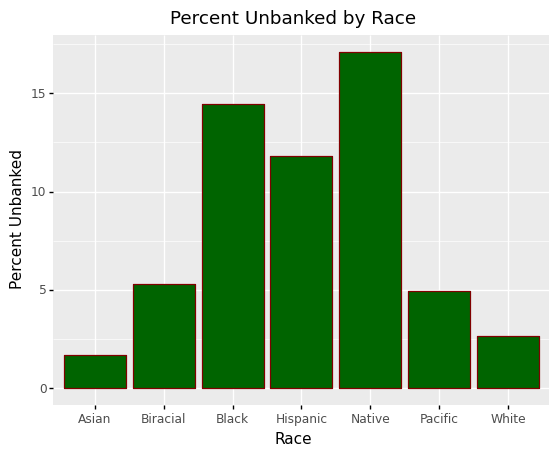

<ggplot: (8788743126941)>

In [5]:
(ggplot(race)       
 + aes(x='race_name', y='pct_unb')    
 + geom_bar(stat="identity", color="maroon",fill="darkgreen") # defining the type of plot to use
 + labs(title='Percent Unbanked by Race', x='Race', y='Percent Unbanked') 
)

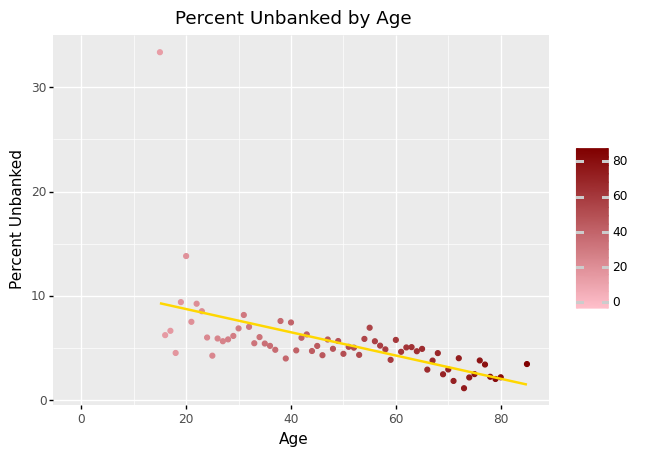

<ggplot: (8788743232506)>

In [6]:
(p9.ggplot(data=age, mapping=p9.aes(x='age', y='pct_unb'))+
 geom_point(aes(color=age.age)) +
 scale_color_gradient(low="pink",high="maroon") +
 geom_smooth(method = "lm", color="Gold", se=False) +
 labs(x='Age', y='Percent Unbanked',color="",title="Percent Unbanked by Age")
)

## Methods and Approaches Considered

Broadly, I sought to find appropriate data and variables to create a machine learning model that factored in a variety of continuous variables with dummies to predict a binary dependent variable, "unbanked." 

I looked into a wide variety of data, but in terms of banking outcomes, the Federal Deposit Insurance Corporation (FDIC) dominates the field with the census administered Household Survey. No other dataset, like those aggregated by the Fed and the OCC had household level data; the FDIC also collects person-level data, though I'm not yet allowed to release that dimension of the survey in this field.

I hoping to add more variables to the dataset outside of the survey (there are ~300 useful varaibles already), but I've had hangups with matching; the survey does not report county level statistics, meaning that I can only import state-level data. There is useful content on the state level, like banks per capita, but I have yet to implement that because it requires a pdf scraper, which was a heavy lift earlier in the project.

I made a binary-only set of variables to learn with, and ultimatley also considered using probit or logit prediction models, due to my binary dependent variable. However, these models were too close to regular statistics, and did not allow for the machine to fully function.


## Methods and Tools Used

I gathered data from the FDIC, which surveys approximatley 70,000 americans, both citizens and noncitizens; they then send a follow up survey, to 32,000 of those, who give more detailed information about their financial standing. The dataset contains 1,400 columns of variables, many of which from retired surveys. I pulled ~30 of these variables to operate on, as many of them are dummies of broader categorical variables, and settled on ~10 to implement in a machine learning model.

Thus far, I've implemented two models through the pipeline we established in class; both yielded that a decision tree regression, with vastly different levels of accuracy. I used the broader pipline to truly allow for machine learning to occur.

## Preliminary Results and Conclusions (Bin/Cont Mix)

In the first model, we employ a handful of continuous variables, but most important are age and income bin. The predictive model is a decision tree, but it appears to predict with limited accuracy, almost exactly 50-50; this is not a great model, but it gives us a starting point for tuning.

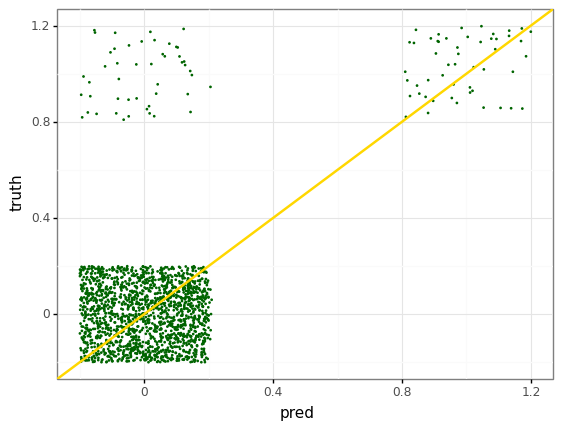

## Preliminary Results and Conclusions (Bin Only)

Because the continuous variables are pretty easy to bin, based on the statistics from the problem question, I turned my remaining continuous variables into binary. For age, I just binned everyone under 25, for income I took everyone below the poverty line, etc. This produced... shocking results:

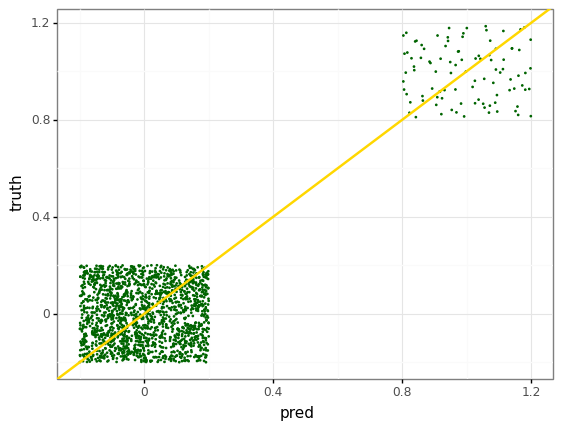

As you can see, we predicted the model with 100% accuracy; and no, I already checked to make sure there was a test training split. Maybe, I'm a data science god? Maybe I'm lucky? Maybe the model is really, really good at predicting the data? I don't know yet.

Anyways, here's a super nice heatmap of the variables:
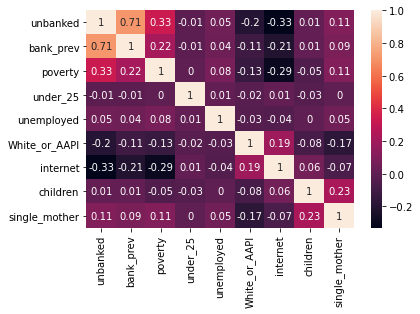

## Lessons Learned and Challenges

### What I've learned so far
- Always check the scale of geographic indicators
- Continuous variables for the sake of continuous variables may not be worth it
- Always reboot your computer regularly

### Challenges
- Getting more data on geography and bank presence, which will require a scraper
- Determining whether or not state-level data predicts an individual level model; maybe running seperate models on aggregate state data
- Determining whether or not to bins future/more data
- Solving the 100% mystery
- Figuring out how to discuss solutions to demographic issues. What policy, other than targeted advertising, can move this issue forward?


## Fin